In [59]:
"""
    Experimentation with neural networks on a datset of MRI covid/non-covid images.
    
    Created: 10/21/2020
    Author(s): Ben Flanders (brf97486)

"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import *

from DataHandler import dataHandler

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
dh = dataHandler() # data handler object. See DataHandler.py for more information.

# ALTER HYPERPARAMETERS HERE
BATCH_SIZE = 16




In [3]:
dataset = dh.get_all_data_labeled(shuffle=True)

In [4]:
# check that all data is in place
assert len(dh.get_non_covid_data_fp()) == 397 and len(dh.get_covid_data_fp()) == 349 and len(dh.get_all_data_labeled()) == (397 + 349)

In [5]:
datapoint = dataset[0] # get some datapoint from the dataset
random_img = cv2.imread(datapoint[0])

Label:  1.0
filepath:  /Users/benflanders/Documents/github/COVID-19-CT-image-analysis-CSCI_8955/data/CT_COVID/2020.03.20.20037325-p23-122.png
image dimensions:  (248, 330, 3)
image datatype:  uint8
image max:  255
image min


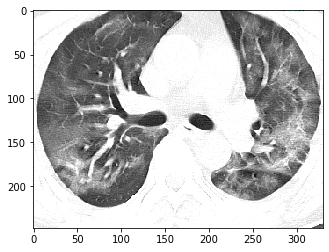

In [6]:
print("Label: ", datapoint[1])
print("filepath: ", datapoint[0])
print("image dimensions: ", random_img.shape)
print("image datatype: ", random_img.dtype)
print("image max: ", random_img.max())
print("image min")
plt.imshow(random_img)

In [7]:
# split the dataset into a train and test dataset

split_point = int(len(dataset) * .8 ) # 80 / 20 split

train_data = dataset[0:split_point]
test_data = dataset[split_point:]

assert len(train_data) + len(test_data) == (397 + 349) # ensure all expected data is present

In [63]:
# get the image data and load it into memory

train_X = np.array([np.mean(dh.load_image(fp, resize=True, grayscale=False)) for (fp, label) in train_data])
train_y = np.array([label for (fp, label) in train_data])

test_X = np.asarray([np.mean(dh.load_image(fp, resize=True, grayscale=False)) for (fp, label) in test_data]).astype('uint8')
test_y = np.asarray([np.asarray(label) for (fp, label) in test_data]).astype('float16')


In [64]:
train_X = np.reshape(train_X, (-1,1))
test_X = np.reshape(test_X, (-1,1))

In [65]:
train_X.shape

(596, 1)

In [66]:
clf = RandomForestClassifier()
clf.fit(train_X, train_y)

RandomForestClassifier()

In [67]:
prediction = clf.predict(test_X)

In [68]:
accuracy_score(test_y, prediction)

0.5733333333333334

150